# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'D:\CareerFoundry\Python-Instancart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_p1.pkl'))

In [3]:
ords_prods_custs.head(5)

,order_id,user_id,eval_set,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,nb_dependants,fam_status,income
0,3139998,138,prior,28,6,11,3.0,1,5,0,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
1,1977647,138,prior,30,6,17,20.0,1,1,1,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
2,3160996,138,prior,1,5,13,NaN,907,4,0,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
3,2254091,138,prior,10,5,14,6.0,907,1,1,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
4,505689,138,prior,9,6,12,7.0,1000,5,0,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0


In [4]:
# changing the prices > $100 to "NaN"
ords_prods_custs.loc[ords_prods_custs['prices'] >100, 'prices'] = np.nan

([<matplotlib.axis.XTick at 0x18032988460>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

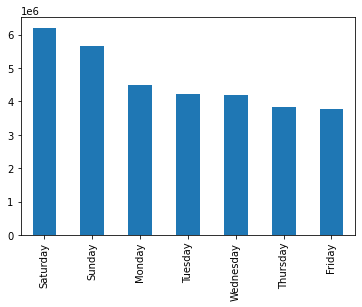

In [5]:
#update x axis
ords_prods_custs['order_day_of_the_week'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6],['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

<AxesSubplot:>

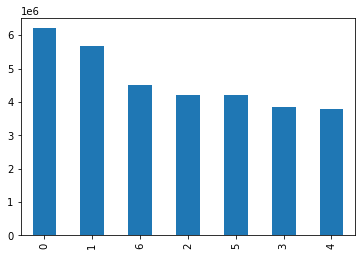

In [6]:
# create a bar chart
ords_prods_custs['order_day_of_the_week'].value_counts().plot.bar()

([<matplotlib.axis.XTick at 0x18036fa76a0>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

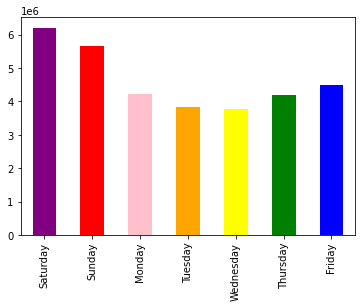

In [7]:
# create bar with color, sorted by days (0-6)
bar = ords_prods_custs['order_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.xticks([0,1,2,3,4,5,6],['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [8]:
# create a sample with 70/30 spilt
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# store 70% of the sample in the dataframe "big"
big = ords_prods_custs[dev]

In [11]:
# store 30% of the sample in the dataframe "small"
small = ords_prods_custs[~dev]

In [12]:
len(ords_prods_custs)

32404859

In [13]:
len(big) +len(small)

32404859

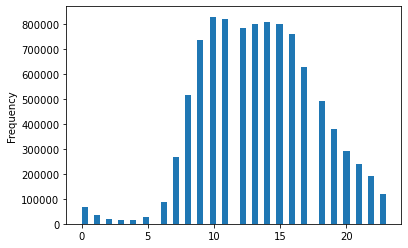

In [14]:
# Q3 Create a histogram of the “order_hour_of_day” column
hist2 = small['order_hour_of_day'].plot.hist(bins = 50)

As the histogram above shows, sales start going up at 6am and peak around 9am until 4pm and then slowly decrease.

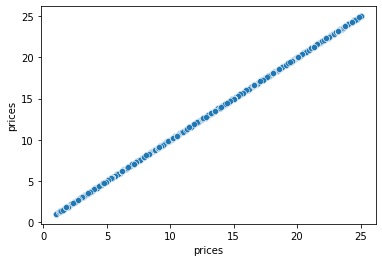

In [15]:
# create a scatterplot for prices
scat2 = sns.scatterplot(x = 'prices', y = 'prices',data = small)

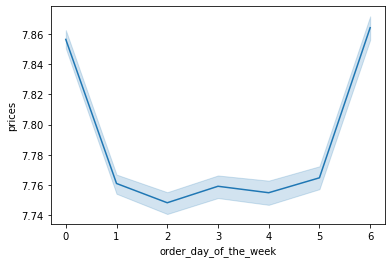

In [16]:
line_2 = sns.lineplot(data = small, x = 'order_day_of_the_week',y = 'prices')

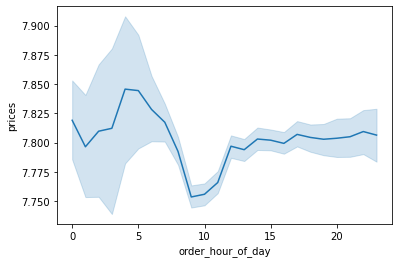

In [17]:
line_3 = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')

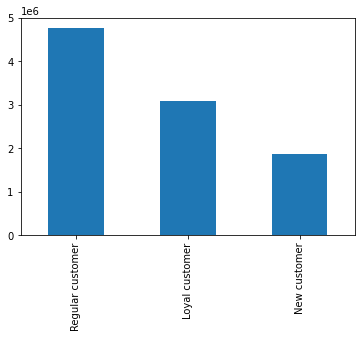

In [18]:
# Q4 Create a bar chart from the “loyalty_flag” column.
bar2 = small['loyalty_flag'].value_counts().plot.bar()

Majority of the customers are "regular customers" following with "loyal customers" then "new customers"

In [19]:
# Q5 Creating new data frame with just the columns needed for the line chart
df_hod_prices = small[['order_hour_of_day','prices']]

In [20]:
df_hod_prices

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8
...,...,...
32404841,8,1.8
32404842,7,1.8
32404843,9,1.8
32404849,9,1.8


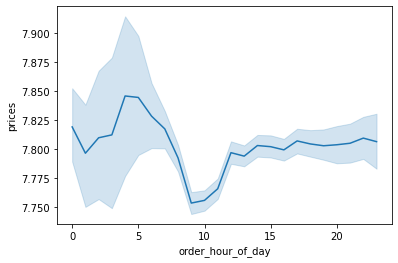

In [21]:
# Create a line chart for "order_hour_of_day" and "prices"
line_hod = sns.lineplot(data = df_hod_prices, x = 'order_hour_of_day',y = 'prices')

The chart show prices starts growing around 9am and peaking around 4am. A deep dive from 4am to 9am can be due to sleeping pattern.

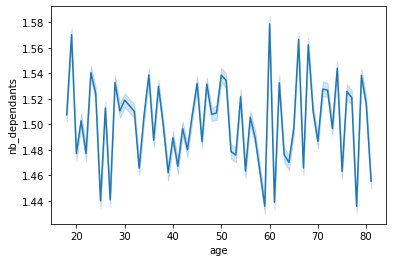

In [22]:
# Create a line chart for "age" and "number of dependants"
line_q6 = sns.lineplot(data = small, x = 'age',y = 'nb_dependants')

From the graph, it doesn't look like there is a correlation between the age and the number of dependants.

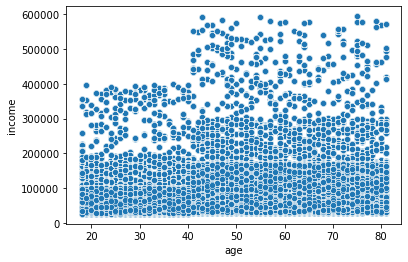

In [23]:
# Q7 create a scatterplot for prices
scat3 = sns.scatterplot(x = 'age', y = 'income',data = small)

# Spending power based on age can be catagorized into the following:
## Majority age 20-40 income are under 200k and a less crowd of age 20-40 income are within 200k to 400k. 
## Majority age 41-80 income are under 300k and a less crowd of age 41-80 income are within 300k to 600K.

# Export visualization to folder

In [24]:
# saving the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_p2.png'))

In [25]:
# Saving the histogram
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_p2.png'))

In [26]:
# Saving the scatterplot 
scat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices_p2.png'))

In [27]:
# Saving the line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_p2.png'))

In [32]:
# Saving the line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dod_p2.png'))

In [28]:
# Saving the bar chart based on Loyalty
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_p2.png'))

In [29]:
# Saving the linw chart based on "order hour of day" and prices
line_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hod_p2.png'))

In [30]:
# Saving the line chart based on "age" and "number of dependants"
line_q6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_q6_p2.png'))

In [31]:
# Saving the scatterplot for prices
scat3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat3_p2.png'))